In [1]:
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
sns.set(style='whitegrid')

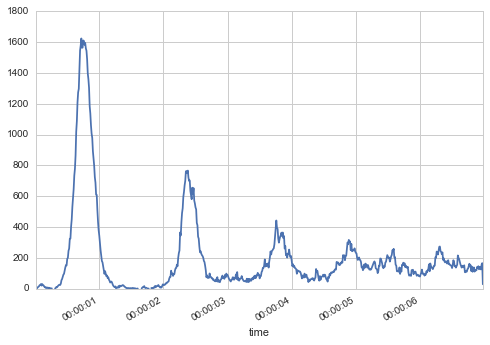

In [11]:
firing_and_regions.one.resample('10ms', how='sum').plot()

In [4]:
def inputs_and_regions_for(energy_name):
    inputData = pd.read_csv('SampleLogs/{}_Input.csv'.format(energy_name), index_col='time', \
                            names= ['time', 'source', 'destination', 'inhibitor'])
    regions = pd.read_csv('SampleLogs/{}_Region.csv'.format(energy_name), index_col='neuron', \
                          names=['neuron', 'region'])
    lowerLimit = pd.to_datetime(5, unit='s')
    inputData.index = pd.to_datetime(inputData.index, unit='ms')
    inputData = inputData[lowerLimit:]
    inputs_and_regions = inputData.join(regions, \
                                        on='source').join(regions, \
                                        on= 'destination', lsuffix='_src', rsuffix='_dst')
    inputs_and_regions['efective_input'] = 1*(1-inputs_and_regions.inhibitor) -1*inputs_and_regions.inhibitor
    answer = inputs_and_regions.groupby([inputs_and_regions.region_src  == inputs_and_regions.region_dst, 'region_src']).\
            efective_input.count().unstack().T
    answer['total'] = answer.sum(axis=1)
    answer = answer.rename(columns={True: 'within_regions', False:'between_regions'})
    return answer

In [5]:
medium = inputs_and_regions_for('MediumConst')

In [6]:
medium.head()

,between_regions,within_regions,total
region_src,,,
1,144,1496,1640
2,157,696,853
3,100,931,1031
4,24,80,104
5,148,932,1080


In [7]:
low  = inputs_and_regions_for('LowConst')

In [8]:
low.head()

,between_regions,within_regions,total
region_src,,,
1,233,2049,2282
2,166,2272,2438
3,152,9,161
4,232,1745,1977
5,151,1402,1553


In [9]:
high  = inputs_and_regions_for('HighConst')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de43990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107fb1450>]], dtype=object)

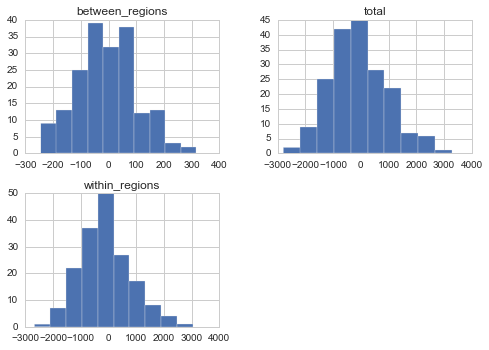

In [10]:
(medium-low).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2622d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f45fd10>]], dtype=object)

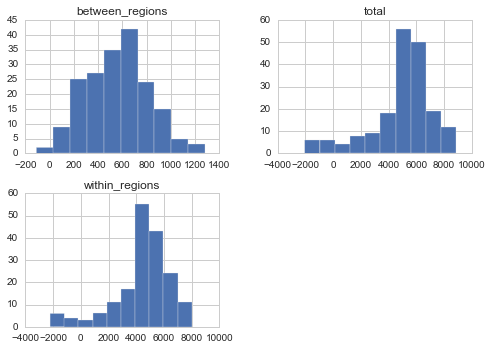

In [11]:
(high-medium).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5f4fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f7d00d0>]], dtype=object)

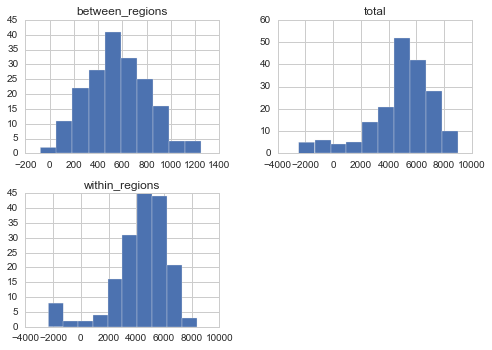

In [12]:
(high-low).hist()

In [13]:
region_location = pd.read_csv('../static/models/regions.obj', header=None, sep=' ')
region_location.index = range(1, len(region_location)+1)
region_location = region_location.drop(0, axis=1)
region_location.columns = ['x', 'y', 'z']
region_location.head()

,x,y,z
1,12.957983,-24.991597,-28.873950
2,45.045872,0.825688,-7.412844
3,-46.607595,2.202532,-38.379747
4,45.020408,39.551020,-11.265306
5,29.526882,-2.860215,-40.516129


In [18]:
merged = medium.join(region_location)
merged.head()

,between_regions,within_regions,total,x,y,z
region_src,,,,,,
1,144,1496,1640,12.957983,-24.991597,-28.873950
2,157,696,853,45.045872,0.825688,-7.412844
3,100,931,1031,-46.607595,2.202532,-38.379747
4,24,80,104,45.020408,39.551020,-11.265306
5,148,932,1080,29.526882,-2.860215,-40.516129


In [63]:
def brain_heatmap(data):
    merged = data.join(region_location)
    fig = plt.figure(figsize=plt.figaspect(1/4.0))
    for idx, column in enumerate(['within_regions', 'between_regions', 'total']):
        ax = fig.add_subplot(1, 3,idx+1, projection='3d')
        ax.set_title(column)
        brain_heatmap_for(merged[column], ax, fig)

In [71]:
def brain_heatmap_for(data, ax, fig):
    cmap = sns.cubehelix_palette(as_cmap=True, start=0.6, light=1, dark=0.1)
    colors = cmap(data/data.max())
    colmap = plt.cm.ScalarMappable(cmap=cmap)
    colmap.set_array(data)
    yg = ax.scatter(merged.x, merged.y, merged.z, c=colors, marker='o')
    cb = fig.colorbar(colmap)

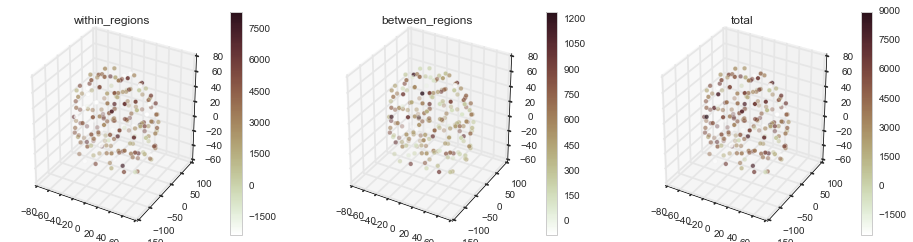

In [72]:
brain_heatmap(high-low)

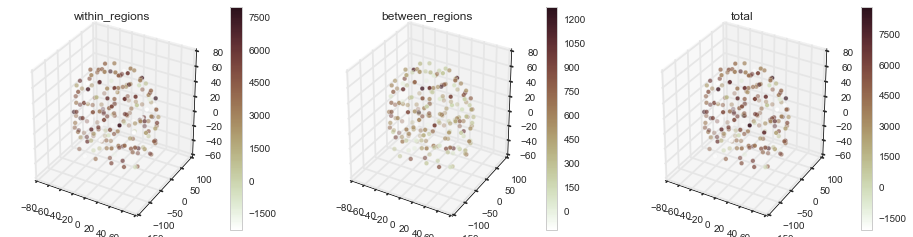

In [73]:
brain_heatmap(high-medium)

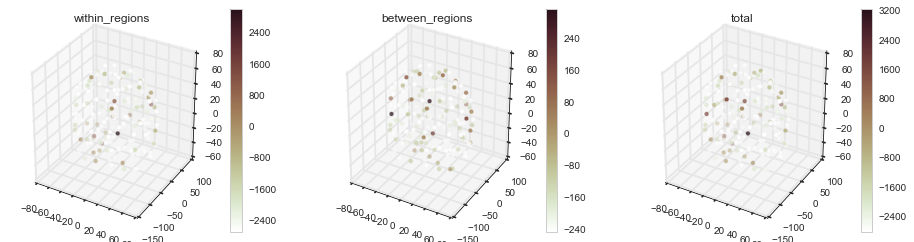

In [74]:
brain_heatmap(medium-low)